In [8]:
import pandas as pd
# import matplotlib.pyplot as plt

df=pd.read_csv('chronic_2016_90_all.csv')
# df[df['CHRONIC']].str.contains('^I3.*')

C:\Users\6708142\AppData\Local\Temp\ipykernel_7028\67326143.py:4: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('chronic_2016_90_all.csv')


In [9]:
df[df['CHRONIC'].str.contains('^I3.*')]

,HOSPCODE,PID,DATE_DIAG,CHRONIC,HOSP_DX,HOSP_RX,DATE_DISCH,TYPEDISCH,D_UPDATE
108038,9569,6488,2011-12-23,I340,NaN,NaN,0000-00-00,3,2016-12-08 14:36:10
602278,23867,17390,2008-03-01,I37,NaN,10682,0000-00-00,3,2009-12-30 14:49:21


In [12]:
df=pd.read_csv('chronic_2016_90_all.csv')
df.dropna(subset=['HOSP_DX'])

C:\Users\6708142\AppData\Local\Temp\ipykernel_7028\3355066230.py:1: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('chronic_2016_90_all.csv')


,HOSPCODE,PID,DATE_DIAG,CHRONIC,HOSP_DX,HOSP_RX,DATE_DISCH,TYPEDISCH,D_UPDATE
0,9435,10002,2016-01-21,I10,10745.0,10745.0,0000-00-00,3,2016-06-21 13:34:24
3,9435,10031,2016-03-31,E119,856.0,9435.0,0000-00-00,3,2016-10-19 09:38:14
4,9435,10036,2009-03-10,E119,10745.0,9435.0,0000-00-00,3,2016-09-06 10:11:39
5,9435,10036,2009-03-10,I10,10745.0,9435.0,0000-00-00,3,2016-09-06 10:11:41
6,9435,10037,2013-08-29,E119,10745.0,9435.0,2016-06-20,2,2016-06-08 14:47:30
...,...,...,...,...,...,...,...,...,...
642465,99782,9923,2010-06-02,E11,11386,99782,0000-00-00,3,2014-12-22 15:57:39
642466,99782,9923,2012-06-20,E115,11386,99782,0000-00-00,3,2014-12-22 15:57:44
642467,99782,9923,2011-02-04,E119,11386,99782,0000-00-00,3,2014-12-22 15:57:48
642468,99782,9923,2014-09-17,E145,11386,99782,0000-00-00,3,2014-12-22 15:57:53


In [14]:
df['HOSP_DX']= pd.to_numeric(df['HOSP_DX'] , errors= 'coerce')
df['HOSP_DX'].mean()

np.float64(11360.18542475818)

In [16]:
import pandas as pd

df1=pd.read_csv('hypertension_2017.csv')
df2=pd.read_csv('hypertension_2018.csv')
df_all= pd.merge(df1, df2 , how ='inner', on = '')
df_all

,zone,province,2017,2018
0,0,Bangkok,128883,136418
1,1,Chiang Mai,33071,35546
2,1,Lamphun,5406,6992
3,1,Lampang,21150,22130
4,1,Phrae,15019,15262
...,...,...,...,...
72,12,Trang,16467,17421
73,12,Phatthalung,11398,12646
74,12,Pattani,7513,7974
75,12,Yala,8652,8359


<Axes: xlabel='PROVINCE_NAME'>

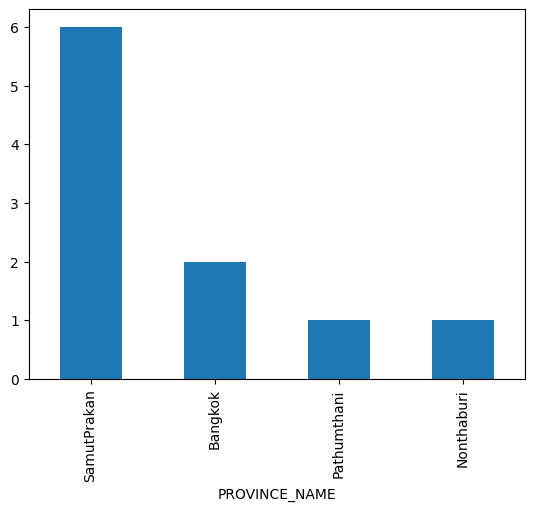

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df1= pd.read_csv('person.csv')
df2= pd.read_csv('province.csv')
df3= pd.read_csv('diag.csv')
df1=df1[['PID','PROVINCE_ID']]
df3=df3[['PID','CHRONIC']]
df_12=pd.merge(df1, df2)
df_all=pd.merge(df_12, df3)
df_all
df_all[df_all['CHRONIC'] == 'E119']['PROVINCE_NAME'].value_counts().plot.bar()



In [27]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


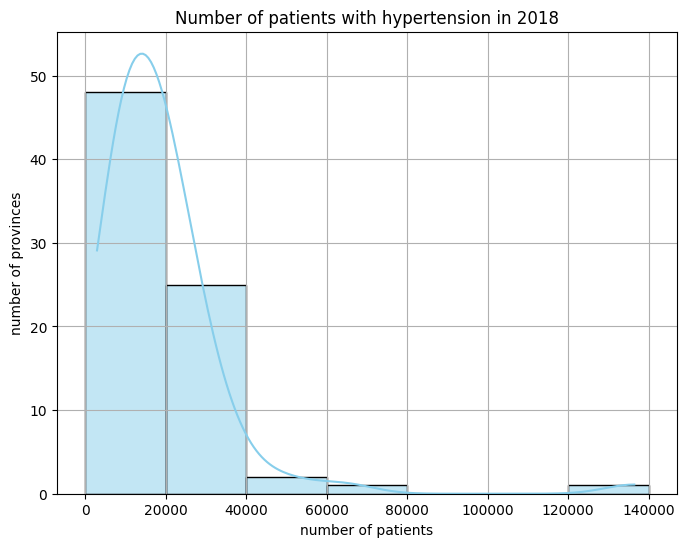

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('hypertension_all.csv')
plt.figure(figsize=(8,6))
sns.histplot(df['2018'], color='skyblue', kde= True, bins= [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000])
plt.title('Number of patients with hypertension in 2018')
plt.xlabel('number of patients')
plt.ylabel('number of provinces')
plt.grid(True)
plt.show()

<Axes: xlabel='province', ylabel='2018'>

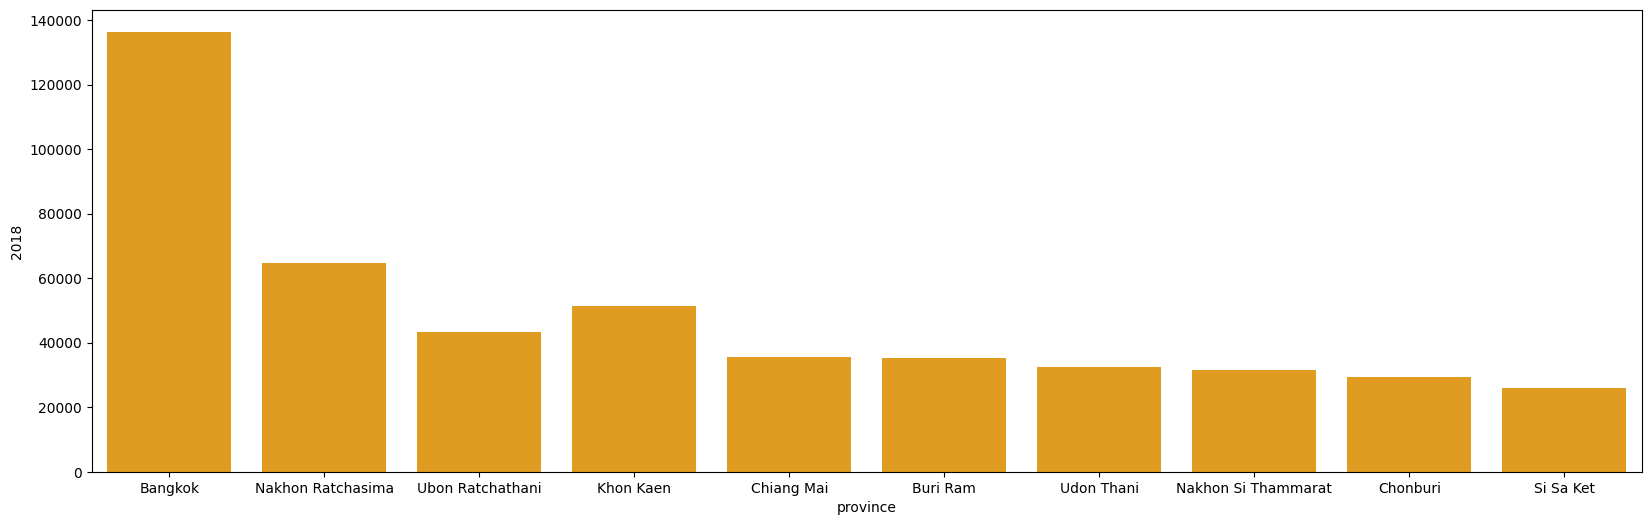

In [35]:
df_top= df.sort_values(by='population', ascending=False).head(10)
df_top
plt.figure(figsize=(20,6))
sns.barplot(x=df_top['province'], y=df_top['2018'],color='orange')